In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import json

im = Image.open("C:\\KDS\\PPT\\a1709953771157.59702708e14b1.jpg")
gh = np.array(im)
colorList = json.load(open('c:\\test.json'))

In [2]:
r = []
g = []
b = []
for i in gh :
    if im.size[0]>im.size[1]:
        for j in range(0, im.size[1]) :
            r.append(i[j, 0])
            g.append(i[j, 1])
            b.append(i[j, 2])
    else :
        for j in range(0, im.size[0]) :
            r.append(i[j, 0])
            g.append(i[j, 1])
            b.append(i[j, 2])


print (gh[0][0])

[54 61 45]


In [3]:
for i in range(20) :
    print ([r[i], g[i], b[i]])

[54, 61, 45]
[56, 63, 47]
[57, 61, 46]
[60, 64, 49]
[56, 60, 45]
[47, 51, 36]
[65, 69, 54]
[65, 69, 54]
[46, 50, 35]
[59, 63, 48]
[61, 65, 50]
[65, 67, 53]
[59, 62, 45]
[54, 57, 40]
[62, 65, 48]
[64, 68, 51]
[55, 58, 41]
[50, 53, 36]
[65, 68, 51]
[64, 67, 50]


In [4]:
color = []

for a in range(len(r)):    
    color.append(str('#%02x%02x%02x' % (r[a], g[a], b[a])))

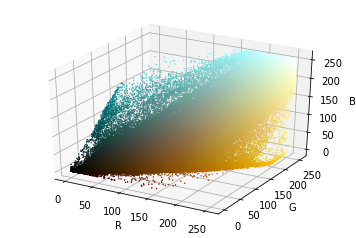

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = r
    ys = g
    zs = b
    ax.scatter(xs, ys, zs, s=0.1, c=color, marker=m)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

In [6]:

kluer = []
for i in range(len(r)) :
    kluer.append(str(r[i])+" "+str(g[i])+" "+str(b[i]))

In [7]:
kluer = list(set(kluer))

In [8]:
realColor = []
for i in kluer :
    realColor.append([i.split(' ')[0], i.split(' ')[1], i.split(' ')[2]])

In [9]:
from sklearn.cluster import KMeans
import sklearn.cluster.k_means_

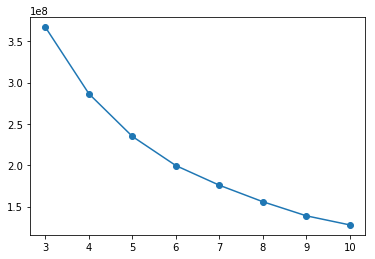

5


In [10]:


def elbow(X):
    sse = []
    a = []
    for i in range(3, 11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(3, 11), sse, marker='o')
    plt.show()
    b=0

    for j in range(len(sse)):  
        a.append((sse[j]-sse[j-1])) 
        c = abs(a[j-1])-abs(a[j])
        if a[j]>a[j-1] :
            if b<c :
                b=c
                global d
                d=j+3
    
                    
elbow(realColor)
print (d)

In [11]:
d = d
model = KMeans(n_clusters=d, init="k-means++", random_state=1).fit(realColor)

e = model.cluster_centers_

<class 'numpy.ndarray'>


In [12]:
def nameConverter(r, g, b):
    r = int(r)
    g = int(g)
    b = int(b)
    minest = 500
    crrectColor = {}
    for i in colorList :
        R = i.get("R")
        G = i.get("G")
        B = i.get("B")
        
        distance = (r-R)*(r-R) + (g-G)*(g-G) + (b-B)*(b-B)
        distance = math.sqrt(distance)
        if minest>distance :
            minest = distance
            crrectColor = i
            
    return crrectColor

In [13]:
e_2 = []
for i in e:
    a = nameConverter(i[0], i[1], i[2])
    e_2.append(str(a.get("R"))+" "+str(a.get("G"))+" "+str(a.get("B")))

print(len(e_2))
e_2 = list(set(e_2))
print(len(e_2))
e = []
for i in e_2:
    e.append([int(i.split(' ')[0]), int(i.split(' ')[1]), int(i.split(' ')[2])])


5
5


In [14]:
d = len(e)
e = np.asarray(e)

65
['#413628', '#bbb477', '#63775b', '#967117', '#d8e4bc']


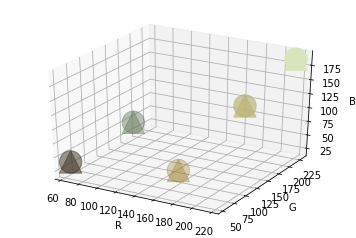

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color = []
print (e[0,0])
for a in range(len(e)):    
    color.append('#%02x%02x%02x' % (int(e[a, 0]), int(e[a, 1]), int(e[a, 2])))
                 
print (color)
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = e[range(d), 0]
    ys = e[range(d), 1]
    zs = e[range(d), 2]
    ax.scatter(xs, ys, zs, s=500, c=color, marker=m)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()